In [1]:
import numpy as np
import matplotlib.pyplot as plt
def hoeffding(phat, n, delta): # Define Hoeffding
    return(np.min(np.array([phat + np.sqrt( np.log(1/delta)  / (2*n) ), 1] )))
def hoeffding_lower(phat, n, delta):
    return (np.max(np.array([phat-np.sqrt( np.log(1/delta)  / (2*n) ), 0])))

hoeffding = np.vectorize(hoeffding)
hoeffding_lower = np.vectorize(hoeffding_lower)

def pinsker(phat, n, delta):
    return(phat + np.sqrt( np.log((n+1)/delta)  / (2*n) )) # Define Pinsker
def refinedpinsker(phat, n, delta):
    return(phat + np.sqrt(2*phat*np.log((n+1)/delta)  / n ) + 2*np.log((n+1)/delta)/n  )

def kl(p,q): #define kl-function
    if p == 1 or p == 0: #handle exceptions
        return 0
    return(p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q))) # Define kl-function 

def klinverse_upper(phat, z):
    low = phat # Initialise lowest and highest possible solutions
    high = 1
    while(high - low > 0.0001): # Set tolerance to 0.0001
        mid = (high + low)/2 # Find midpoint
        if(kl(phat, mid) <= z): # Test if kl() evaluated on the average is less than given z
            low = mid #If lower, raise the low value to the mid value
        else:
            high = mid # Else lower the high value to the mid value
    return(low) # Return the low value, for the maximal p where inequality still holds
vectorized_upper_inverse = np.vectorize(klinverse_upper)

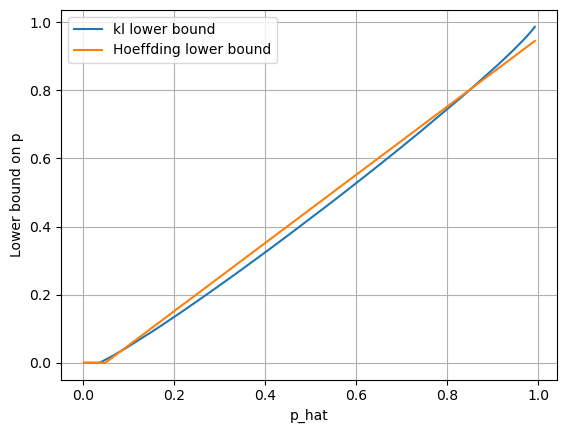

In [2]:
phats = np.arange(0.001,0.994,0.001)
hoef = np.minimum(1,hoeffding(phats, 1000, 0.01))
pinsk = np.minimum(1,pinsker(phats, 1000,0.01))
refpinsk = np.minimum(1,refinedpinsker(phats, 1000,0.01))
kl_upper = vectorized_upper_inverse(phats, np.log((1000+1)/0.01)/1000)
kl_lower = np.maximum(0,2*phats - vectorized_upper_inverse(phats, np.log((1000+1)/0.01)/1000))
hoef_low = hoeffding_lower(phats, 1000,0.01)

plt.plot(phats, hoef, label = "Hoeffding")
plt.plot(phats, pinsk, label = "Pinsker")
plt.plot(phats, refpinsk, label = "Refined Pinsker")
plt.plot(phats, kl_upper, label = "kl")
plt.legend()
plt.grid()
plt.xlabel("p_hat")
plt.ylabel("Upper bound on p")
plt.savefig("upperbound.png")
plt.ylim([0,1])
plt.close()



plt.plot(phats, hoef, label = "Hoeffding")
plt.plot(phats, pinsk, label = "Pinsker")
plt.plot(phats, refpinsk, label = "Refined Pinsker")
plt.plot(phats, kl_upper, label = "kl")
plt.legend()
plt.grid()
plt.xlabel("p_hat")
plt.ylabel("Upper bound on p")
plt.xlim([0,0.1])
plt.ylim([0,0.25])
plt.savefig("upperbound_zoom.png")
plt.close()



plt.plot(phats, kl_lower, label = "kl lower bound")
plt.plot(phats, hoef_low, label = "Hoeffding lower bound")
plt.grid()
plt.xlabel("p_hat")
plt.ylabel("Lower bound on p")
plt.legend()
plt.savefig("lowerbound.png")